In [1]:
from pathlib import Path

origin_path = Path("data/code_contests-test.json")

target_paths = [
    ("none", Path("results/20240924-gpt-tc_output-none/eval_result.json"), None),
    (
        "gold-code",
        Path("results/20240924-gpt-tc_output-gold-code/eval_result.json"),
        "--",
    ),
    (
        "gold-lbl",
        Path("results/20240924-gpt-tc_output-gold-lbl/eval_result.json"),
        "--",
    ),
    # ("gold-func", Path("results/20240924-gpt-tc_output-gold-func/eval_result.json"), None),
    # ("gold-nl", Path("results/20240924-gpt-tc_output-gold-nl/eval_result.json"), None),
    (
        "pred-code",
        Path("results/20240924-gpt-tc_output-pred-code/eval_result.json"),
        None,
    ),
    (
        "pred-lbl",
        Path("results/20240924-gpt-tc_output-pred-lbl/eval_result.json"),
        None,
    ),
    # ("pred-func", Path("results/20240924-gpt-tc_output-pred-func/eval_result.json"), None),
    # ("pred-nl", Path("results/20240924-gpt-tc_output-pred-nl/eval_result.json"), None),
    # ("gold-pdb-lbl", Path("results/20240924-gpt-tc_output-gold-pdb-lbl/eval_result.json"), None),
    # ("gold-pdb-func", Path("results/20240924-gpt-tc_output-gold-pdb-func/eval_result.json"), None),
]

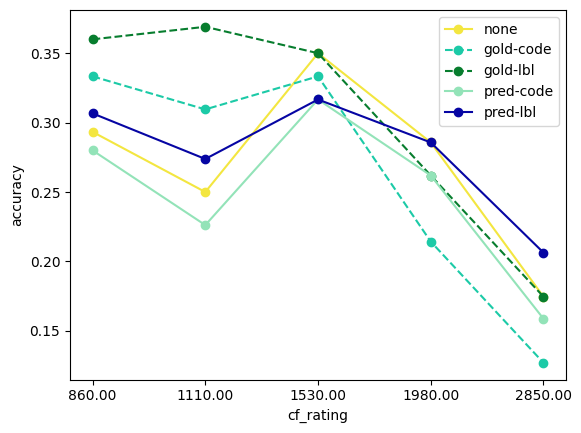

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import random


# cf_rating에 따른 accuracy histogram
# language는 python만
def plot_one(origin_path, target_path, name, linestyle):

    with open(origin_path, "r") as f:
        origin = json.load(f)

    with open(target_path, "r") as f:
        target = json.load(f)

    data = []
    for o, t in zip(origin, target):
        if o["language"] != 3:
            continue

        data.append((o["cf_rating"], t["accuracy"]))

    data = sorted(data, key=lambda x: x[0])

    df = pd.DataFrame(data, columns=["cf_rating", "accuracy"])
    num_bins = 5
    df["cf_rating_bin"], bin_edges = pd.qcut(
        df["cf_rating"],
        num_bins,
        retbins=True,
        duplicates="drop",
    )
    grouped = df.groupby("cf_rating_bin").mean()

    bin_labels = [
        f"{(bin_edges[i]+bin_edges[i+1])/2:.2f}" for i in range(len(bin_edges) - 1)
    ]

    color = [random.random() for _ in range(3)]
    plt.plot(
        bin_labels,
        grouped["accuracy"],
        marker="o",
        color=color,
        label=name,
        linestyle=linestyle,
    )
    plt.xlabel("cf_rating")
    plt.ylabel("accuracy")


for name, target_path, linestyle in target_paths:
    plot_one(origin_path, target_path, name, linestyle)

plt.legend()
plt.show()